In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


Taken from ARK Fintech Innovation ETF.

In [8]:
weights = np.array([
    12.64, 7.92, 7.29, 7.12, 5.96, 5.19, 4.94, 4.04, 3.77, 3.66,
    3.59, 3.12, 3.07, 2.48, 2.40, 2.32, 2.28, 2.23, 2.13, 2.07,
    1.67, 1.39, 1.36, 1.33, 1.14, 1.09, 0.99, 0.98, 0.80, 0.51,
    0.42
])

assets = np.array(['COIN', 'SHOP', 'SQ', 'DKNG', 'PATH', 'ADYEN.AS', 'HOOD', 'GLBE', 'MELI', 'TWLO',
        'TOST', 'INTU', 'ROKU', 'PINS', 'STNE', 'RBLX', 'SOFI', 'DSY.PA', 'PLTR', 'NU',
        'TDOC', 'BILL', 'KSPI.IL', '4689.T', 'AVDX', 'NVDA', 'META', 'CRWD', 'ICE', 'SPOT', 'Z'])

start_date = '2014-01-01'
end_date = '2024-01-01'
data = yf.download(assets.tolist(), start=start_date, end=end_date)['Adj Close']

# get weighted values of equities
data_weighted = data * (weights / 100)
data_weighted = data_weighted.dropna() 
portfolio_returns = data_weighted.sum(axis=1)

# calculate periodic daily return 
returns = np.log1p(portfolio_returns.pct_change()).dropna()
returns.tail()

[                       0%%                      ]

[*********************100%%**********************]  31 of 31 completed


Date
2023-12-21    0.003487
2023-12-22    0.003358
2023-12-27    0.013636
2023-12-28   -0.002144
2023-12-29   -0.005562
dtype: float64

In [9]:
mu, sigma = returns.mean(), returns.std()
print(mu)
print(sigma)

-0.0008482876491668409
0.025847209693669188


In [10]:
# vs single equity
# daily return: 0.0125%
# std: 0.02904

In [11]:
# simulated returns on next year of trading
sim_rets = np.random.normal(mu, sigma, 252)

In [12]:
weighted_prices = data * (weights / 100)
initial = weighted_prices.sum(axis=1).iloc[-1]

In [13]:
sim_prices = initial * (sim_rets + 1).cumprod()

In [14]:
# acquire Rm market rate (S&P 500)
market = "^GSPC"
sp500_data = yf.download(market, start=start_date, end=end_date)
sp500_data['Daily_Return'] = sp500_data['Adj Close'].pct_change()
annual_returns = sp500_data.groupby(sp500_data.index.year)['Daily_Return'].sum()

# Print annual returns
rm = annual_returns.mean()
print(f"Annual Returns: {rm}")


[*********************100%%**********************]  1 of 1 completed

Annual Returns: 0.11147521896745069


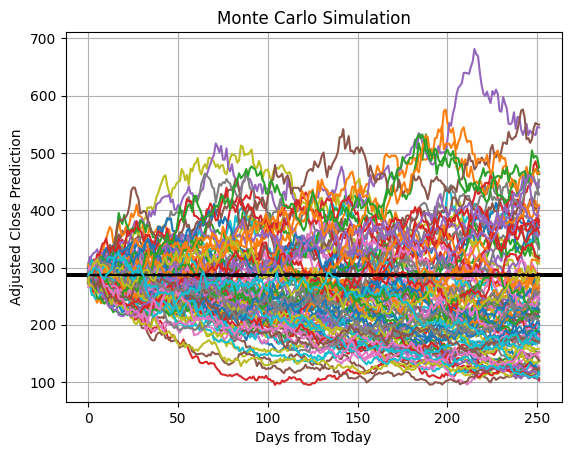

Number of Simulations that Underperformed: 73

Number of Simulations that beat the Market: 23


In [15]:
count = 0
mkt_count = 0
simulations = 100

for i in range(simulations):
    # annual monte carlo simulation (252 trading days)
    sim_rets = np.random.normal(mu, sigma, 252) 
    sim_prices = initial * (sim_rets + 1).cumprod()
    plt.axhline(initial, c='k')
    plt.title("Monte Carlo Simulation")
    plt.ylabel('Adjusted Close Prediction')
    plt.xlabel('Days from Today') 
    plt.grid(True)
    plt.plot(sim_prices)

    # check if end value >= to initial value
    if sim_prices[-1] >= initial:
        count += 1

    if sim_prices[-1] >= initial * (1+rm): 
        mkt_count += 1
plt.show()
print(f"Number of Simulations that Underperformed: {simulations-count}\n")

print(f"Number of Simulations that beat the Market: {mkt_count}")
